In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cassandra23-ps-2/dataset/sample_submissions.csv
/kaggle/input/cassandra23-ps-2/dataset/train_data.csv
/kaggle/input/cassandra23-ps-2/dataset/test_data.csv


In [77]:
df = pd.read_csv(r"/kaggle/input/cassandra23-ps-2/dataset/train_data.csv")

In [78]:
df


,UID,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,actual_time
0,lWYYrbNEdf,2018-09-15 02:23:18.656742,thanos::sroute:9d8ed3f7-a8af-4393-ad7a-c57a720...,FTL,trip-153697819865649878,IND832109AAB,Jamshedpur_Central_I_3 (Jharkhand),IND834002AAB,Ranchi_Hub (Jharkhand),2018-09-15 02:23:18.656742,...,2018-09-15 04:45:23,158.807515,778.672716,1228.735753,2.782826,77.988686,20.793472,28.475783,3.292773,100.0
1,iNJcHQlPCm,2018-09-30 15:07:48.971326,thanos::sroute:b9142a73-d68f-46ec-9afc-d145479...,FTL,trip-153832006897106333,IND422011AAD,Nashik_TgrniaRD_I (Maharashtra),IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),2018-09-30 22:38:13.903069,...,2018-10-01 05:38:30,81.388109,227.479029,NaN,3.625248,68.517914,18.787231,34.612259,4.277350,61.0
2,U6N0M43qwR,2018-09-23 22:15:46.635975,thanos::sroute:883e99fa-50a3-40e0-a2e2-9b12ed6...,FTL,trip-153774094663572416,IND845305AAA,Raxaul_KairiyaT_D (Bihar),NaN,Muzaffrpur_Bbganj_I (Bihar),2018-09-24 03:56:37.016232,...,2018-09-24 09:21:30,134.486898,400.072069,1188.943158,4.415969,70.475386,24.371978,29.867950,5.322072,69.0
3,RrJUneuYNj,2018-09-21 05:11:44.833176,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,FTL,trip-153750670483274503,IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),IND854326AAB,Purnia_Central_H_2 (Bihar),2018-09-22 10:08:32.593022,...,2018-09-22 14:09:17,262.866674,510.123878,999.421258,2.946647,101.876844,19.588977,27.794019,4.265799,300.0
4,7QLdD7iRC9,2018-09-18 01:10:49.936747,thanos::sroute:b43ec86d-59c1-452c-b4a9-807d357...,FTL,trip-153723305402762987,IND411033AAA,Pune_Tathawde_H (Maharashtra),IND501359AAE,Hyderabad_Shamshbd_H (Telangana),2018-09-18 01:10:49.936747,...,2018-09-18 12:14:05,379.389280,NaN,NaN,1.998790,46.571301,22.671495,26.971844,3.553652,286.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72153,dNuV95njhn,2018-09-29 12:35:30.065739,thanos::sroute:ace9e650-93bd-49ab-9400-8ed7a29...,FTL,trip-153822453006548340,IND501359AAE,Hyderabad_Shamshbd_H (Telangana),IND585104AAA,Gulbarga_Nehrugnj_I (Karnataka),2018-09-29 12:35:30.065739,...,2018-09-29 20:08:31,135.001150,NaN,1392.622148,1.950803,55.856356,39.233287,46.999351,1.383605,92.0
72154,ZSrzBfWx77,2018-09-22 11:00:33.571928,thanos::sroute:34b3abb5-f538-4f43-bbeb-5b12c1a...,Carting,trip-153761403357161860,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND560083AAB,Bengaluru_Bnnrghta_L (Karnataka),2018-09-22 11:00:33.571928,...,2018-09-22 13:11:21,74.245265,374.255819,NaN,1.927801,35.976514,13.607794,15.139818,1.456469,30.0
72155,XsIYBRVK2V,2018-09-14 23:01:12.630742,thanos::sroute:16dbdb8b-1ca6-4d26-a45c-18d378e...,FTL,trip-153696607263047584,IND629179AAA,Marthandam_Nallur_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-09-15 04:20:06.629681,...,2018-09-15 06:53:24,54.097087,895.612578,902.191591,2.148569,44.101033,23.355458,27.510588,2.346207,74.0
72156,6YwMOShK5E,2018-09-22 06:11:41.998188,thanos::sroute:23372931-5898-4276-970b-0df5070...,FTL,trip-153759670199790692,IND110037AAM,Delhi_Airport_H (Delhi),IND282001AAA,Agra_Idgah_P (Uttar Pradesh),2018-09-22 06:11:41.998188,...,2018-09-22 15:42:27,99.918631,NaN,1393.905281,2.206373,37.771823,18.740087,29.929128,2.499566,122.0


In [79]:
df.columns


Index(['UID', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'osrm_time',
       'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'actual_time'],
      dtype='object')

In [80]:
df['trip_uuid'].value_counts()

trip-153689939954743811    56
trip-153846035308581166    56
trip-153741795740530104    56
trip-153750670483274503    55
trip-153819749763881430    54
                           ..
trip-153684758182048957     1
trip-153788048470099142     1
trip-153850313832185205     1
trip-153787939890361711     1
trip-153775443915828230     1
Name: trip_uuid, Length: 13535, dtype: int64

In [81]:
df['od_start_time'].head()

0    2018-09-15 02:23:18.656742
1    2018-09-30 22:38:13.903069
2    2018-09-24 03:56:37.016232
3    2018-09-22 10:08:32.593022
4    2018-09-18 01:10:49.936747
Name: od_start_time, dtype: object

In [82]:
df['od_end_time'].head()

0    2018-09-15 06:33:35.824186
1    2018-10-01 06:48:37.637477
2    2018-09-24 11:15:00.826140
3    2018-09-22 19:17:22.242888
4    2018-09-18 17:58:48.449251
Name: od_end_time, dtype: object

In [83]:
df['start_scan_to_end_scan'].head()

0     713.521495
1     902.759458
2     923.666146
3     705.451567
4    1109.682268
Name: start_scan_to_end_scan, dtype: float64

In [84]:
df['date'] = pd.to_datetime(df['od_start_time']).dt.date
df['time'] = pd.to_datetime(df['od_start_time']).dt.time

In [85]:
df['date'] = df['date'].astype(str)

In [86]:
k

NameError: name 'k' is not defined

In [ ]:
df['date'].str.contains('2018-09').value_counts()

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['date'] = pd.to_numeric(df['date'])



In [ ]:
df['date'].head()

In [94]:
df.corr()

,start_scan_to_end_scan,is_cutoff,cutoff_factor,actual_distance_to_destination,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,actual_time
start_scan_to_end_scan,1.000000,0.294295,0.773168,0.765404,0.572010,0.573307,-0.021593,0.089647,0.203742,0.277770,-0.023314,0.774909
is_cutoff,0.294295,1.000000,0.186803,0.185524,0.128636,0.136089,-0.113993,-0.005426,0.192595,0.223086,-0.112467,0.164992
cutoff_factor,0.773168,0.186803,1.000000,0.989353,0.735757,0.738855,-0.063342,0.046462,0.150077,0.215535,-0.033546,0.979045
actual_distance_to_destination,0.765404,0.185524,0.989353,1.000000,0.727968,0.731005,-0.062711,0.046220,0.149600,0.214109,-0.032893,0.968574
osrm_time,0.572010,0.128636,0.735757,0.727968,1.000000,0.545686,-0.054089,0.034890,0.122186,0.161373,-0.026080,0.721952
osrm_distance,0.573307,0.136089,0.738855,0.731005,0.545686,1.000000,-0.048434,0.032852,0.112278,0.159805,-0.026512,0.725394
factor,-0.021593,-0.113993,-0.063342,-0.062711,-0.054089,-0.048434,1.000000,0.483292,-0.047380,-0.032232,0.511604,0.032473
segment_actual_time,0.089647,-0.005426,0.046462,0.046220,0.034890,0.032852,0.483292,1.000000,0.466988,0.484160,0.461917,0.120842
segment_osrm_time,0.203742,0.192595,0.150077,0.149600,0.122186,0.112278,-0.047380,0.466988,1.000000,0.922130,-0.069188,0.163041
segment_osrm_distance,0.277770,0.223086,0.215535,0.214109,0.161373,0.159805,-0.032232,0.484160,0.922130,1.000000,-0.058539,0.226091


In [97]:
df['route_type'].value_counts()
dfk = df.copy()
dfk = dfk[['actual_time', 'route_type']]
mean_by_day = dfk.groupby('route_type')['actual_time'].mean()


# Print mean values
print(mean_by_day)

route_type
Carting     70.700269
FTL        577.766921
Name: actual_time, dtype: float64


In [108]:
print(df['source_center'].unique())
dfj = df.copy()
dfj = dfj[['actual_time', 'source_center']]
mean_by_day = dfj.groupby('source_center')['actual_time'].mean()


# Print mean values/
print(mean_by_day)

['IND832109AAB' 'IND422011AAD' 'IND845305AAA' ... 'IND811213AAA'
 'IND484551AAA' 'IND273303AAA']
source_center
IND000000AAL     59.700000
IND000000AAQ     73.333333
IND000000AAS     48.916667
IND000000AAZ    152.000000
IND000000ABA     34.750000
                   ...    
IND854105AAB    119.400000
IND854311AAA     50.333333
IND854326AAB    896.831068
IND854334AAA     29.666667
IND854335AAA     34.785714
Name: actual_time, Length: 1456, dtype: float64


In [111]:
df['factor']

0        2.782826
1        3.625248
2        4.415969
3        2.946647
4        1.998790
           ...   
72153    1.950803
72154    1.927801
72155    2.148569
72156    2.206373
72157    2.500283
Name: factor, Length: 72158, dtype: float64

In [104]:
df['source_name'].value_counts()
dfj = df.copy()
dfj = dfj[['actual_time', 'source_name']]
mean_by_day = dfj.groupby('source_name')['actual_time'].mean()


# Print mean values/
print(mean_by_day)

source_name
AMD_Memnagar (Gujarat)                  28.666667
AMD_Rakhial (Gujarat)                   43.769231
Abohar_DC (Punjab)                      65.000000
Achrol_BgwriDPP_D (Rajasthan)           59.500000
Addanki_Oilmilrd_D (Andhra Pradesh)    150.000000
                                          ...    
Weir_BsstdDPP_D (Rajasthan)            119.714286
YamunaNagar_DC (Haryana)                91.047619
Yellandu_Sudimala_D (Telangana)        100.409091
Yellareddy_JKRoad_D (Telangana)         58.357143
Zahirabad_Mohim_D (Telangana)          116.307692
Name: actual_time, Length: 1456, dtype: float64


In [ ]:
df['actual_time'].corr(df['date'])

In [87]:
import pandas as pd
from datetime import datetime

# Read in CSV file
#df = pd.read_csv('my_dataset.csv')

# Define function to convert date to day of the week
def get_day_of_week(date_string):
    date_obj = datetime.strptime(date_string,  '%Y-%m-%d')
    day_of_week = date_obj.strftime('%A')
    return day_of_week

# Apply function to date column and create new column
df['day_of_week'] = df['date'].apply(get_day_of_week)

# Print first 10 rows of dataframe
print(df['day_of_week'].head(10))

0     Saturday
1       Sunday
2       Monday
3     Saturday
4      Tuesday
5       Monday
6     Saturday
7    Wednesday
8      Tuesday
9       Monday
Name: day_of_week, dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['day_of_week_encoded'] = le.fit_transform(df['day_of_week'])


In [ ]:
import pandas as pd

# Read in CSV file
#df = pd.read_csv('my_dataset.csv')

# Convert date column to day of the week
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['day_of_week'] = df['date'].dt.day_name()

# One-hot encode day_of_week column
day_dummies = pd.get_dummies(df['day_of_week'], prefix='day')
df = pd.concat([df, day_dummies], axis=1)

# Calculate correlation between binary columns and actual_time
correlations = df[['actual_time', 'day_Monday', 'day_Tuesday', 'day_Wednesday', 'day_Thursday', 'day_Friday', 'day_Saturday', 'day_Sunday']].corr()
print(correlations)


In [ ]:
import pandas as pd
from datetime import datetime

# Read in CSV file
# df = pd.read_csv('my_dataset.csv')

# Define function to convert date to day of the week
def get_day_of_week(date_string):
    date_obj = datetime.strptime(date_string, '%Y-%m-%d')
    day_of_week = date_obj.strftime('%A')
    return day_of_week

# Apply function to date column and create new column
df['day_of_week'] = df['date'].apply(get_day_of_week)
print(df['actual_time'].unique())
# print(df.dtypes)

# One-hot encode day of week column
# df = pd.get_dummies(df, columns=['day_of_week'])

# # Fit linear regression model
# from sklearn.linear_model import LinearRegression
# X = df.drop(['actual_time'], axis=1)
# y = df['actual_time']
# reg_model = LinearRegression().fit(X, y)

# # Print regression coefficients
# print(reg_model.coef_)


In [ ]:
import pandas as pd

# Read in the dataset
df = pd.read_csv('my_dataset.csv')

# Create a list of columns that can be one-hot encoded
ohe_columns = []
for col in df.columns:
    if df[col].dtype == 'object' and len(df[col].unique()) < 10:
        ohe_columns.append(col)

# Create a list of columns that cannot be one-hot encoded
non_ohe_columns = []
for col in df.columns:
    if col not in ohe_columns:
        non_ohe_columns.append(col)

# Drop the columns that cannot be one-hot encoded
df = df.drop(non_ohe_columns, axis=1)

# Apply one-hot encoding to the remaining columns
df = pd.get_dummies(df, columns=ohe_columns)

# Perform regression analysis on the encoded dataset
# ...


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder


# Read in CSV file
#df = pd.read_csv('my_dataset.csv')

# # Extract day of week from date column
# df['date_column'] = pd.to_datetime(df['date_column'], format='%Y/%m/%d')
# df['day_of_week'] = df['date_column'].dt.day_name()

# Drop unnecessary columns
#df = df.drop(['date'], axis=1)
df = df[['actual_time', 'day_of_week']]
# One-hot encode day of week column
ohe = OneHotEncoder()
ohe_results = ohe.fit_transform(df[['day_of_week']])
df_encoded = pd.concat([df.drop(['day_of_week'], axis=1), pd.DataFrame(ohe_results.toarray(), columns=ohe.get_feature_names(['day_of_week']))], axis=1)

# Perform linear regression analysis
X = df_encoded.drop(['actual_time'], axis=1)
y = df_encoded['actual_time']
lm = LinearRegression()
lm.fit(X, y)

# Print coefficients and intercept
print('Coefficients:', lm.coef_)
print('Intercept:', lm.intercept_)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

# Read in CSV file
#df = pd.read_csv('my_dataset.csv')

# Drop unnecessary columns
df = df[['actual_time', 'day_of_week']]

# One-hot encode day of week
df = pd.get_dummies(df, columns=['day_of_week'])

# Define X and y variables
X = df.drop(['actual_time'], axis=1)
y = df['actual_time']
print(X.columns)
# Add constant term to X variable
X = sm.add_constant(X)

# Perform regression analysis
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

# Plot scatter plot and regression line
sns.regplot(x=X['Monday'], y=y, scatter=True)
sns.regplot(x=X['Tuesday'], y=y, scatter=True)
sns.regplot(x=X['Wednesday'], y=y, scatter=True)
sns.regplot(x=X['Thursday'], y=y, scatter=True)
sns.regplot(x=X['Friday'], y=y, scatter=True)
sns.regplot(x=X['Saturday'], y=y, scatter=True)
sns.regplot(x=X['Sunday'], y=y, scatter=True)
plt.xlabel('Day of Week')
plt.ylabel('Actual Time')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

# Read in CSV file
#df = pd.read_csv('my_dataset.csv')

# Drop unnecessary columns
df = df[['actual_time', 'day_of_week']]

# One-hot encode day of week
df = pd.get_dummies(df, columns=['day_of_week'])

# Define X and y variables
X = df.drop(['actual_time'], axis=1)
y = df['actual_time']

# Add constant term to X variable
X = sm.add_constant(X)

# Perform regression analysis
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

# Plot scatter plot and regression line
sns.regplot(x=X['day_of_week_Monday'], y=y, scatter=True)
sns.regplot(x=X['day_of_week_Tuesday'], y=y, scatter=True)
sns.regplot(x=X['day_of_week_Wednesday'], y=y, scatter=True)
sns.regplot(x=X['day_of_week_Thursday'], y=y, scatter=True)
sns.regplot(x=X['day_of_week_Friday'], y=y, scatter=True)
sns.regplot(x=X['day_of_week_Saturday'], y=y, scatter=True)
sns.regplot(x=X['day_of_week_Sunday'], y=y, scatter=True)
plt.xlabel('Day of Week')
plt.ylabel('Actual Time')
plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Read in CSV file
#df = pd.read_csv('my_dataset.csv')

# Drop unnecessary columns
df = df[['actual_time', 'day_of_week']]

# One-hot encode day of week
df = pd.get_dummies(df, columns=['day_of_week'])

# Define X and y variables
X = df.drop(['actual_time'], axis=1)
y = df['actual_time']

# Add constant term to X variable
X = sm.add_constant(X)

# Perform regression analysis
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())


In [ ]:
df['day_of_week'].head()

In [88]:
import pandas as pd

# Read in CSV file
#df = pd.read_csv('my_dataset.csv')

# Create a copy of the original dataframe
df_copy = df.copy()

# Drop unnecessary columns
df_copy = df_copy[['actual_time', 'day_of_week']]

# One-hot encode day of week
df_copy = pd.get_dummies(df_copy, columns=['day_of_week'])

# Define X and y variables
X = df_copy.drop(['actual_time'], axis=1)
y = df_copy['actual_time']

# Add constant term to X variable
X = sm.add_constant(X)

# Perform regression analysis
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            actual_time   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     6.025
Date:                Sun, 02 Apr 2023   Prob (F-statistic):           2.59e-06
Time:                        09:39:40   Log-Likelihood:            -5.6400e+05
No. Observations:               72158   AIC:                         1.128e+06
Df Residuals:                   72151   BIC:                         1.128e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   365.78

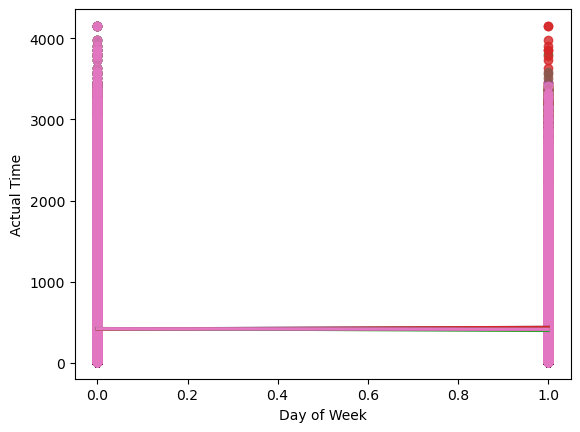

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.regplot(x=X['day_of_week_Sunday'], y=y, scatter=True)
sns.regplot(x=X['day_of_week_Monday'], y=y, scatter=True)
sns.regplot(x=X['day_of_week_Tuesday'], y=y, scatter=True)
sns.regplot(x=X['day_of_week_Wednesday'], y=y, scatter=True)
sns.regplot(x=X['day_of_week_Thursday'], y=y, scatter=True)
sns.regplot(x=X['day_of_week_Friday'], y=y, scatter=True)
sns.regplot(x=X['day_of_week_Saturday'], y=y, scatter=True)
plt.xlabel('Day of Week')
plt.ylabel('Actual Time')
plt.show()

Text(0, 0.5, 'Mean Actual Time')

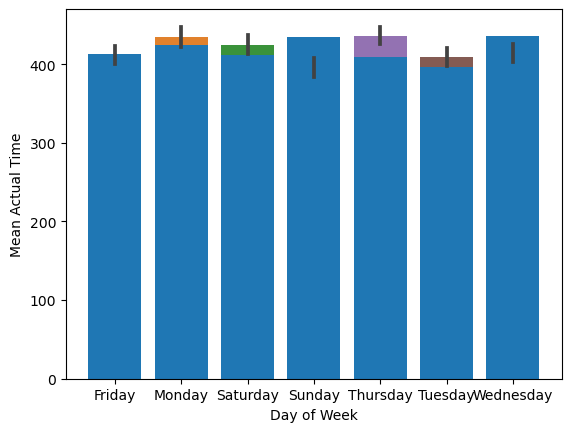

In [91]:
sns.barplot(x='day_of_week', y='actual_time', data=df)
# or
import matplotlib.pyplot as plt
import numpy as np

means = df.groupby('day_of_week').mean()['actual_time']
plt.bar(x=np.arange(len(means)), height=means)
plt.xticks(np.arange(len(means)), labels=means.index)
plt.xlabel('Day of Week')
plt.ylabel('Mean Actual Time')


In [93]:
dfn = df.copy()
dfn = dfn[['actual_time', 'day_of_week']]
mean_by_day = df.groupby('day_of_week')['actual_time'].mean()


# Print mean values
print(mean_by_day)

day_of_week
Friday       413.433754
Monday       424.723248
Saturday     411.596689
Sunday       434.924559
Thursday     409.396402
Tuesday      396.315923
Wednesday    435.878738
Name: actual_time, dtype: float64


In [112]:
import pandas as pd

# Read in CSV file
#df = pd.read_csv('my_dataset.csv')

# One-hot encode route type
dfg = df.copy()
dfg = pd.get_dummies(dfg, columns=['route_type'])

# Calculate correlation matrix
corr_matrix = dfg[['actual_time', 'route_type_Carting', 'route_type_FTL']].corr()

# Print correlation matrix
print(corr_matrix)


                    actual_time  route_type_Carting  route_type_FTL
actual_time            1.000000           -0.392253        0.392253
route_type_Carting    -0.392253            1.000000       -1.000000
route_type_FTL         0.392253           -1.000000        1.000000
